In [2]:
import os
os.chdir('/Users/schoens/Documents/PhD/IIASA/04_Code/income_decile')

In [3]:
from pathlib import Path

import pandas as pd 
import numpy as np
import xarray as xr
import geopandas as gpd 
from shapely import box
import pycountry

from tqdm.notebook import tqdm

import config.config as cfg 
from config.config import (PROCESSED_GMT_FILE,
                           GRAPHICS_DIR, GRAPHICS_PAPER_MAIN_DIR, GRAPHICS_PAPER_APPENDIX_DIR, 
                           RESULTS_DIR,
                           fontsize_medium,
                           fontsize_small,
                           fontsize_large, 
                           regions,
                           region_naming_dict, 
                           population_shares, 
                           group_colors,
                           uncertainty_color,
                           sensitvitiy_color,
                           symbols,
                           EU27_ids
                           )
from utils.plotting_functions import lighten_color

import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import colormaps as cmaps
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, to_rgba
import matplotlib.colors as cm
from matplotlib.legend_handler import HandlerTuple

from tabulate import tabulate

from itertools import product
import regionmask

plt.rcParams['svg.fonttype'] = 'none'

In [4]:
tas_frequency_df = xr.open_dataset(RESULTS_DIR / 'tas_frequency_hot.nc').stack(coords = ('lat', 'lon')).dropna('coords', how = 'all')
spei_frequency_df = xr.open_dataset(RESULTS_DIR / 'spei_frequency_dry.nc').stack(coords = ('lat', 'lon')).dropna('coords', how = 'all')
tas_intensity_df = xr.open_dataset(RESULTS_DIR / 'tas_intensity_hot.nc').stack(coords = ('lat', 'lon')).dropna('coords', how = 'all')
spei_intensity_df = xr.open_dataset(RESULTS_DIR / 'spei_intensity_dry.nc').stack(coords = ('lat', 'lon')).dropna('coords', how = 'all')

In [13]:
# group = 'p90p100'
# markers = ['o', 'o', 'o', 'o']

# with sns.axes_style('whitegrid'):
#     fig, axes = plt.subplots(1,4, figsize = (20, 5))
#     for i_region, region in enumerate(['US', 'EU27', 'IN', 'CN']): 
#         ax = axes[i_region]
#         lower_bounds_tas = tas_frequency_df['attributed_tas'].sel(region = region, group = group, month = 7,).isel(extreme_quantile = 1).quantile(q = 0.05, dim = 'model').values
#         lower_bounds_spei = spei_frequency_df['attributed_spei'].sel(region = region, group = group, month = 7,).isel(extreme_quantile = 1).quantile(q = 0.05, dim = 'model').values
#         medians_tas = tas_frequency_df['attributed_tas'].sel(region = region, group = group, month = 7,).isel(extreme_quantile = 1).mean(dim = 'model').values 
#         medians_spei = spei_frequency_df['attributed_spei'].sel(region = region, group = group, month = 7,).isel(extreme_quantile = 1).mean(dim = 'model').values 
        
#         ax.scatter(medians_tas[(lower_bounds_tas > 0) & (lower_bounds_spei > 0)],
#                     medians_spei[(lower_bounds_tas > 0) & (lower_bounds_spei > 0)],
#                     s = 10, 
#                     alpha = .3,
#                     color = 'C0',
#                     marker = markers[i_region]
#         )
#         ax.scatter(medians_tas[(lower_bounds_tas > 0) & (lower_bounds_spei <= 0)],
#                     medians_spei[(lower_bounds_tas > 0) & (lower_bounds_spei <= 0)],
#                     s = 10,
#                     alpha = 0.3,
#                     marker = markers[i_region],
#                     color = 'orange'
#         )
#         ax.scatter(medians_tas[(lower_bounds_tas <= 0) & (lower_bounds_spei > 0)],
#                     medians_spei[(lower_bounds_tas <= 0) & (lower_bounds_spei > 0)],
#                     s = 10,
#                     alpha = 0.3,
#                     marker = markers[i_region],
#                     color = 'purple'
#         )
#         ax.scatter(medians_tas[(lower_bounds_tas <= 0) & (lower_bounds_spei <= 0)],
#                     medians_spei[(lower_bounds_tas <= 0) & (lower_bounds_spei <= 0)],
#                     s = 10,
#                     alpha = 0.3,
#                     marker = markers[i_region],
#                     color = 'indianred'
#         )
#         print(len(medians_tas[(lower_bounds_tas > 0) & (lower_bounds_spei > 0)])/2652*100, 
#               len(medians_tas[(lower_bounds_tas > 0) & (lower_bounds_spei <= 0)])/2652*100,
#               len(medians_tas[(lower_bounds_tas <= 0) & (lower_bounds_spei > 0)])/2652*100,
#               len(medians_tas[(lower_bounds_tas <= 0) & (lower_bounds_spei <= 0)])/2652*100
#         )
#     plt.show()

In [12]:
# region = 'US'
# group = 'p90p100'
# extreme_quantile = 1
# month = 10
 
# lower_bounds_tas = tas_frequency_df['attributed_tas'].sel(region = region, group = group, month = month).isel(extreme_quantile = extreme_quantile).quantile(q = 0.05, dim = 'model').values
# lower_bounds_spei = spei_frequency_df['attributed_spei'].sel(region = region, group = group, month = month).isel(extreme_quantile = extreme_quantile).quantile(q = 0.05, dim = 'model').values
# medians_tas = tas_frequency_df['attributed_tas'].sel(region = region, group = group, month = month).isel(extreme_quantile = extreme_quantile).mean(dim = 'model').values 
# medians_spei = spei_frequency_df['attributed_spei'].sel(region = region, group = group, month = month).isel(extreme_quantile = extreme_quantile).mean(dim = 'model').values 

# insig = tas_frequency_df['coords'].values[(lower_bounds_tas <= 0) & (lower_bounds_spei <= 0)]

# binary = (lower_bounds_tas <= 0) & (lower_bounds_spei <= 0)*1

# bool_df  = xr.DataArray(binary, coords = {'coords': tas_frequency_df['coords']}, dims = 'coords').unstack('coords').sortby('lon')

# fig, ax  = plt.subplots(figsize = (10, 10), subplot_kw = {'projection': ccrs.Robinson()})
# # ax.coatlines()
# bool_df.plot(ax = ax, cmap = 'coolwarm', add_colorbar = False, transform = ccrs.PlateCarree())
# plt.show()

In [8]:
import regionmask 

# selecting regions
ar6 = regionmask.defined_regions.ar6.land
mask = ar6.mask(tas_frequency_df)
df_agg_tas = tas_frequency_df.groupby(mask).median('coords')
df_agg_spei = spei_frequency_df.groupby(mask).median('coords')


In [9]:
magicc_df = pd.read_csv(RESULTS_DIR / 'Attributed_GMT.csv', index_col = 0)

magicc_region_dict = dict(zip(['global', 'US', 'EU27', 'IN', 'CN'], 
                              ['World', 'US', 'EU27', 'IN', 'CN']))
magicc_group_dict = dict(zip(['historic', 'all', 'top 10', 'top 1', 'top 0.1'], 
                              ['hisotric', 'p0p100', 'p90p100', 'p99p100', 'p999p1000']))

magicc_df['region'] = magicc_df['region'].map(magicc_region_dict)
magicc_df['group'] = magicc_df['group'].map(magicc_group_dict)

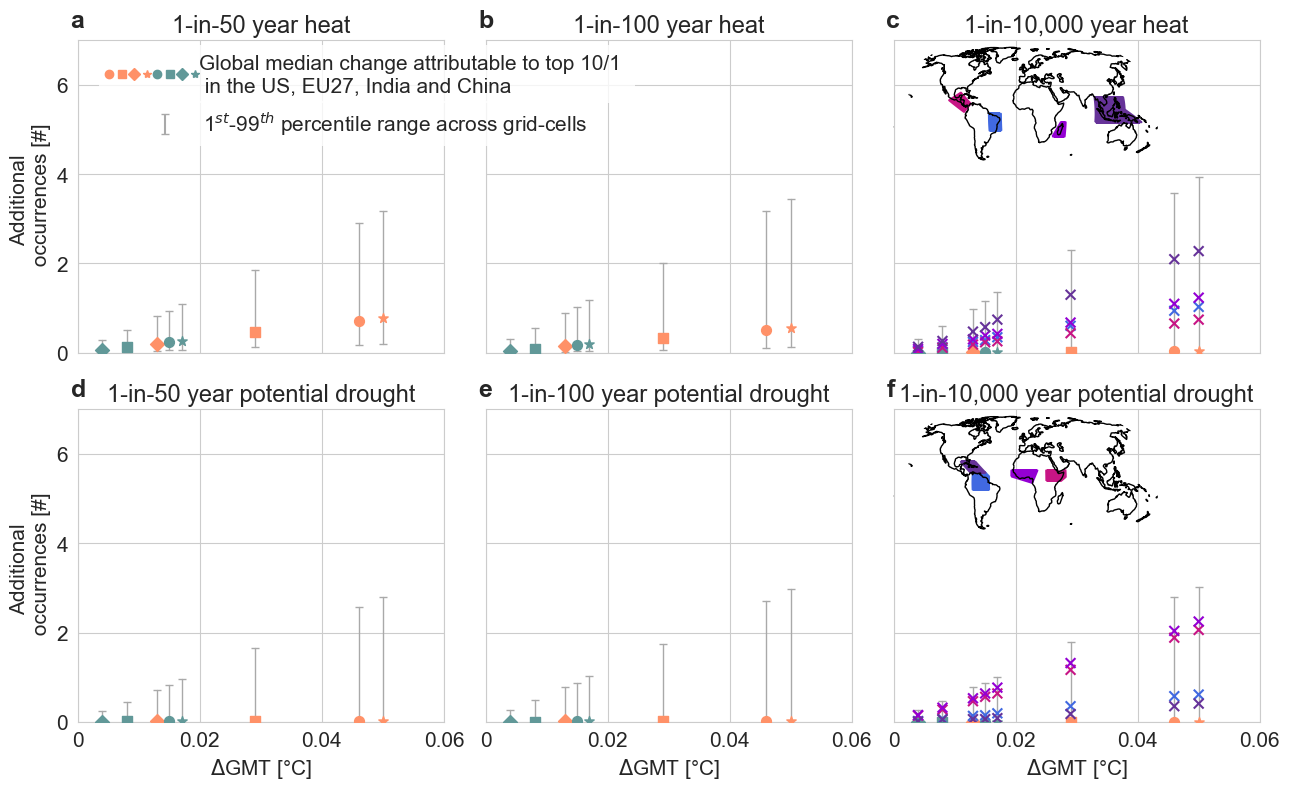

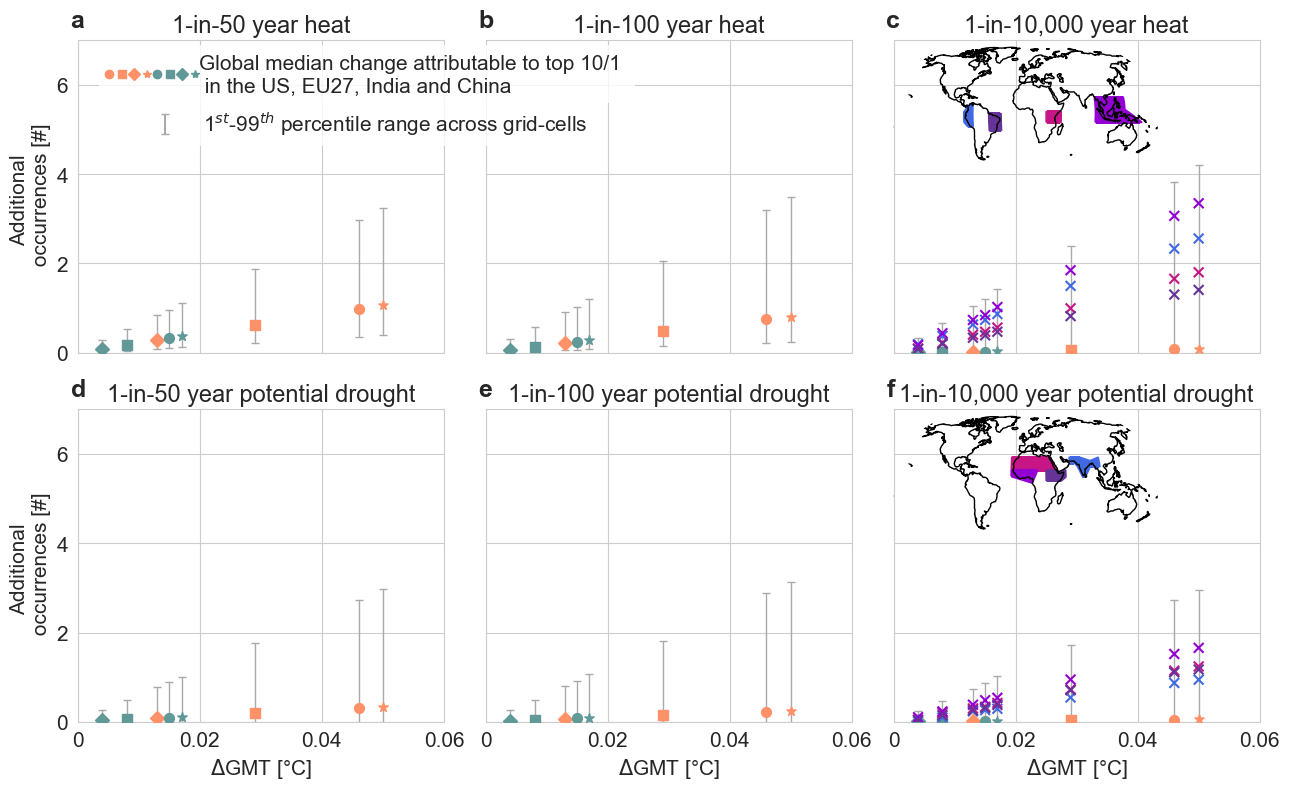

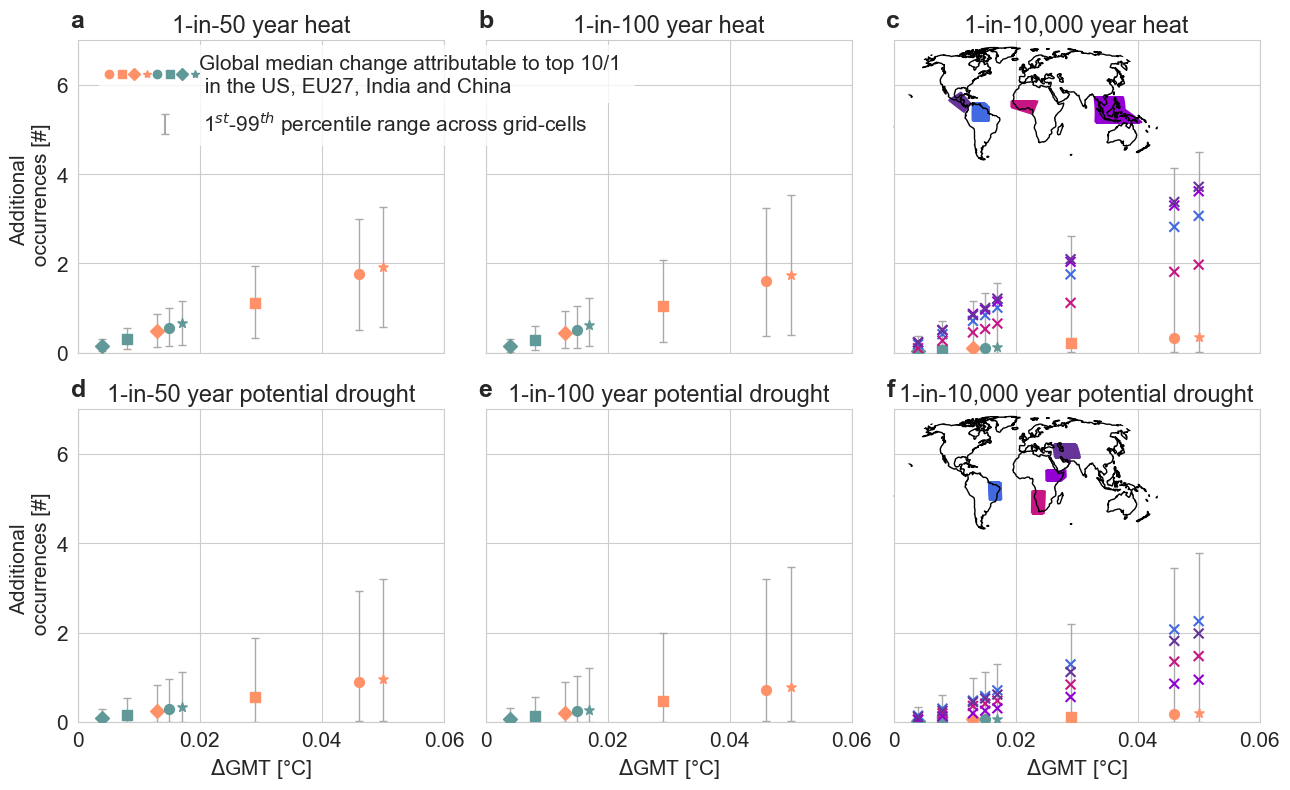

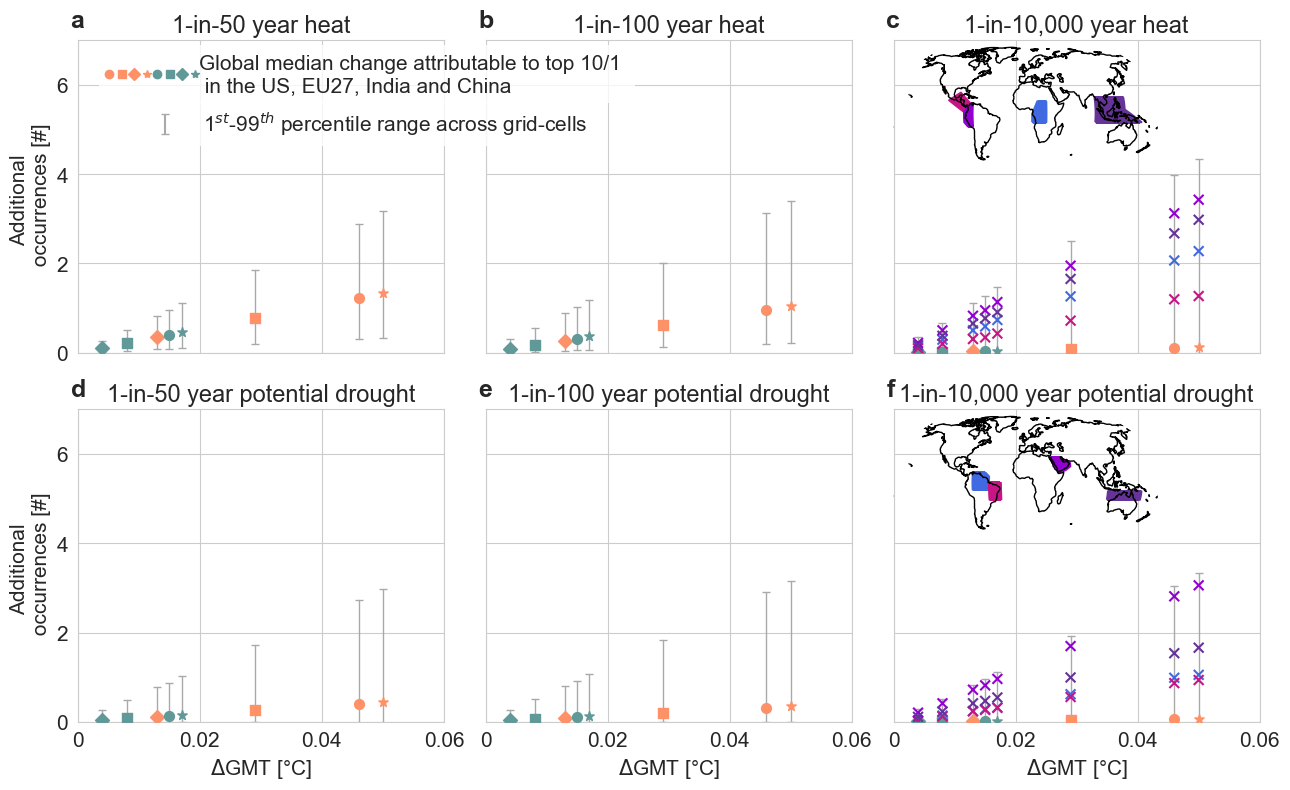

In [10]:
for month in [1,4,7,10]:
    month_name = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][month]
    titles = ['1-in-50 year heat', 
            '1-in-100 year heat',
            '1-in-10,000 year heat']
    symbols = ['o', 's', 'D', '*', 'P']
    gdf = ar6.to_geodataframe()
    gdf = gdf.set_index("abbrevs")

    # impact_region_colors = cm.PuRd(np.linspace(0.2,1,4))
    impact_region_colors = ['royalblue', 'mediumvioletred', 'darkviolet', 'rebeccapurple']
    impact_region_symbols = ['x','x','x','x']
    emitter_regions = ['US', 'EU27', 'IN', 'CN']
    n_regions = len(emitter_regions)

    with sns.axes_style('whitegrid'): 
        fig  = plt.figure(figsize = (13,8))
        gs   = GridSpec(12, 12, figure=fig)
        
        axes = []
        
        all_sel_tas = {7: [10, 21, 38, 7],  
                       10: [22, 7, 9, 38],  
                        1: [11, 7, 27, 38],  
                        4: [9,24,38,11]}
        sel_impact_regions = all_sel_tas[month]
        region_names = [ar6[region].abbrev for region in sel_impact_regions]

        for i_q in range(3): 
            ax = fig.add_subplot(gs[:6, i_q*4:(i_q+1)*4])
            for i_group in range(2):
                group = ['p90p100', 'p99p100'][i_group]
                for i_region in range(n_regions):    
                    region = emitter_regions[i_region]
                    # distribution bars 
                    ax.plot([magicc_df[(magicc_df.region == region) & (magicc_df.group == group)].loc[:, 'equal-scaling_mean'].values, 
                            magicc_df[(magicc_df.region == region) & (magicc_df.group == group)].loc[:, 'equal-scaling_mean'].values],
                            np.quantile(tas_frequency_df['attributed_tas'].sel(group = group, 
                                                                                region = region, 
                                                                                month = month).isel(extreme_quantile = i_q).mean(dim = 'model').values, q = [0.01, 0.99]),
                            marker = '_', 
                            color= group_colors[0],
                            lw = 1
                            )
                    # 
                    ax.scatter(magicc_df[(magicc_df.region == region) & (magicc_df.group == group)].loc[:, 'equal-scaling_mean'].values,
                            np.median(tas_frequency_df['attributed_tas'].sel(group = group, 
                                                                            region = region, 
                                                                            month = month).isel(extreme_quantile = i_q).mean(dim = 'model').values),
                                s = 50,
                                marker = symbols[i_region],
                                color= group_colors[i_group + 1],
                                zorder = 10
                                )
                    if i_q == 2: 
                        ax.scatter([magicc_df[(magicc_df.region == region) & (magicc_df.group == group)].loc[:, 'equal-scaling_mean'].values]*len(sel_impact_regions), 
                                df_agg_tas['attributed_tas'].sel(group = group, 
                                            region = region, 
                                            month = month, 
                                            mask = sel_impact_regions).isel( extreme_quantile = i_q).mean(dim = 'model').values,
                                s = 50, 
                                marker = 'x',
                                c = impact_region_colors,
                                zorder = 10
                                )

            ax.set_ylim(0,7)
            ax.set_title(titles[i_q], fontsize = fontsize_large)
            if i_q == 0:
                ax.set_yticks([0,2,4,6],
                            [0,2,4,6],
                            fontsize = fontsize_medium)
                ax.set_ylabel('Additional \n occurrences [#]',
                            fontsize = fontsize_medium)
                
            else: 
                ax.set_yticks([0,2,4,6],
                            [])
            ax.set_xticks([0, 0.02, 0.04, 0.06],
                        [])
            # ax.set_xlabel('$\Delta$GMT [°C]', fontsize = fontsize_medium)
            axes.append(ax)
        
        ### add map
        ax = fig.add_subplot(gs[:3, 8:11], projection=ccrs.Robinson(), frameon=False)
        ax.spines['geo'].set_visible(False)
        ax.set_extent([-177, 180, -60, 90], crs=ccrs.PlateCarree())
        ax.coastlines(edgecolor = 'lightgrey')
        for i_impact_region, abbrev in enumerate(region_names): 
            gdf.loc[[abbrev]].plot(ax=ax, transform=ccrs.PlateCarree(), 
                                    facecolor= impact_region_colors[i_impact_region], 
                                    edgecolor = impact_region_colors[i_impact_region], 
                                    lw = 1.5)
            
        titles = ['1-in-50 year potential drought', 
                '1-in-100 year potential drought', 
                '1-in-10,000 year potential drought']
        
        all_sel_spei = {7: [11,25,23,32], 
                10: [10,11,36,39], 
                1: [10,23,21,8], 
                4: [37,20,21,23]}
        sel_impact_regions = all_sel_spei[month]

        region_names = [ar6[region].abbrev for region in sel_impact_regions]
        
        for i_q in range(3): 
            ax = fig.add_subplot(gs[6:, i_q*4:(i_q+1)*4])
            for i_group in range(2):
                group = ['p90p100', 'p99p100'][i_group]
                for i_region in range(n_regions):    
                    region = emitter_regions[i_region]
                    # distribution bars 
                    ax.plot([magicc_df[(magicc_df.region == region) & (magicc_df.group == group)].loc[:, 'equal-scaling_mean'].values, 
                            magicc_df[(magicc_df.region == region) & (magicc_df.group == group)].loc[:, 'equal-scaling_mean'].values],
                            np.quantile(spei_frequency_df['attributed_spei'].sel(group = group, 
                                                                                region = region, 
                                                                                month = month).isel(extreme_quantile = i_q).mean(dim = 'model').values, q = [0.01, 0.99]),
                            marker = '_', 
                            color= group_colors[0],
                            lw = 1
                            )
                    # 
                    ax.scatter(magicc_df[(magicc_df.region == region) & (magicc_df.group == group)].loc[:, 'equal-scaling_mean'].values,
                            np.median(spei_frequency_df['attributed_spei'].sel(group = group, 
                                                                            region = region, 
                                                                            month = month).isel(extreme_quantile = i_q).mean(dim = 'model').values),
                                s = 50,
                                marker = symbols[i_region],
                                color= group_colors[i_group + 1],
                                zorder = 10
                                )
                    if i_q == 2: 
                        ax.scatter([magicc_df[(magicc_df.region == region) & (magicc_df.group == group)].loc[:, 'equal-scaling_mean'].values]*len(sel_impact_regions), 
                                df_agg_spei['attributed_spei'].sel(group = group, 
                                            region = region, 
                                            month = month, 
                                            mask = sel_impact_regions).isel( extreme_quantile = i_q).mean(dim = 'model').values,
                                s = 50, 
                                marker = 'x',
                                c = impact_region_colors,
                                zorder = 10
                                )

            ax.set_ylim(0,7)
            ax.set_title(titles[i_q], 
                        fontsize = fontsize_large)
            if i_q == 0:
                ax.set_yticks([0,2,4,6],
                            [0,2,4,6],
                            fontsize = fontsize_medium)
                ax.set_ylabel('Additional \n occurrences [#]',
                            fontsize = fontsize_medium)
            else: 
                ax.set_yticks([0,2,4,6],
                            [])
            ax.set_xticks([0,0.02, 0.04, 0.06],
                        [0,0.02, 0.04, 0.06],
                        fontsize = fontsize_medium)
            ax.set_xlabel('$\Delta$GMT [°C]', fontsize = fontsize_medium)
            axes.append(ax)
        
        ### add map
        ax = fig.add_subplot(gs[6:9, 8:11], projection=ccrs.Robinson(), frameon=False)
        ax.spines['geo'].set_visible(False)
        ax.set_extent([-177, 180, -60, 90], crs=ccrs.PlateCarree())
        ax.coastlines(edgecolor = 'lightgrey')
        for i_impact_region, abbrev in enumerate(region_names): 
            gdf.loc[[abbrev]].plot(ax=ax, transform=ccrs.PlateCarree(), 
                                    facecolor= impact_region_colors[i_impact_region], 
                                    edgecolor = impact_region_colors[i_impact_region], 
                                    lw = 1.5)
        
        xs = [-0.02]*6
        ys = [1.1]*6
        lettering = ['a', 'b', 'c', 'd', 'e', 'f']
        for i in range(6):
                axes[i].text(xs[i], ys[i], lettering[i], transform=axes[i].transAxes, fontsize=fontsize_large+1, fontweight='bold', va='top')

        from matplotlib.container import ErrorbarContainer
        from matplotlib.lines import Line2D
        from matplotlib.collections import LineCollection
        
        line = Line2D([],[], ls="none", color = 'darkgrey')
        circle =  Line2D([],[], lw=0, color = 'darkgrey', marker = 'o')
        symbols_legend_orange = tuple([Line2D([],[], lw=0, color = group_colors[1], marker = symbol) for symbol in symbols[:-1]])
        symbols_legend_teal = tuple([Line2D([],[], lw=0, color = group_colors[2], marker = symbol) for symbol in symbols[:-1]])
        barline = LineCollection(np.empty((2,2,2)), color = 'darkgrey')
        err = ErrorbarContainer((line, [line], [barline]), has_xerr=False, has_yerr=True)

        legend = fig.legend(handles=[symbols_legend_orange, 
                            symbols_legend_teal], labels=["", "Global median change attributable to top 10/1 \n in the US, EU27, India and China"], 
                            fontsize = fontsize_medium,
                            title_fontsize = fontsize_medium,
                            edgecolor = 'none',
                            facecolor = (1,1,1,0.7),
                            handler_map={tuple: HandlerTuple(ndivide=None)},
                            ncols = 2,
                            handletextpad=0.1,
                            columnspacing = 0.2,
                            bbox_to_anchor = (0.5, 0.95),
                            )     
        fig.legend(handles=[err], labels=["1$^{st}$-99$^{th}$ percentile range across grid-cells"], 
                    fontsize = fontsize_medium,
                    edgecolor = 'none',
                    facecolor = (1,1,1,0.7),
                    bbox_to_anchor = (0.47, 0.88))
        
        fig.tight_layout()
        plt.savefig(GRAPHICS_PAPER_APPENDIX_DIR / 'graphics' / f'change_in_likelihood_{month_name}.pdf', dpi = 600)
        plt.show()
    